In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [38]:
import pickle

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [12]:
data.shape

(500, 9)

In [13]:
data=data.drop(columns=['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [14]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [18]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [19]:
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])

In [20]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


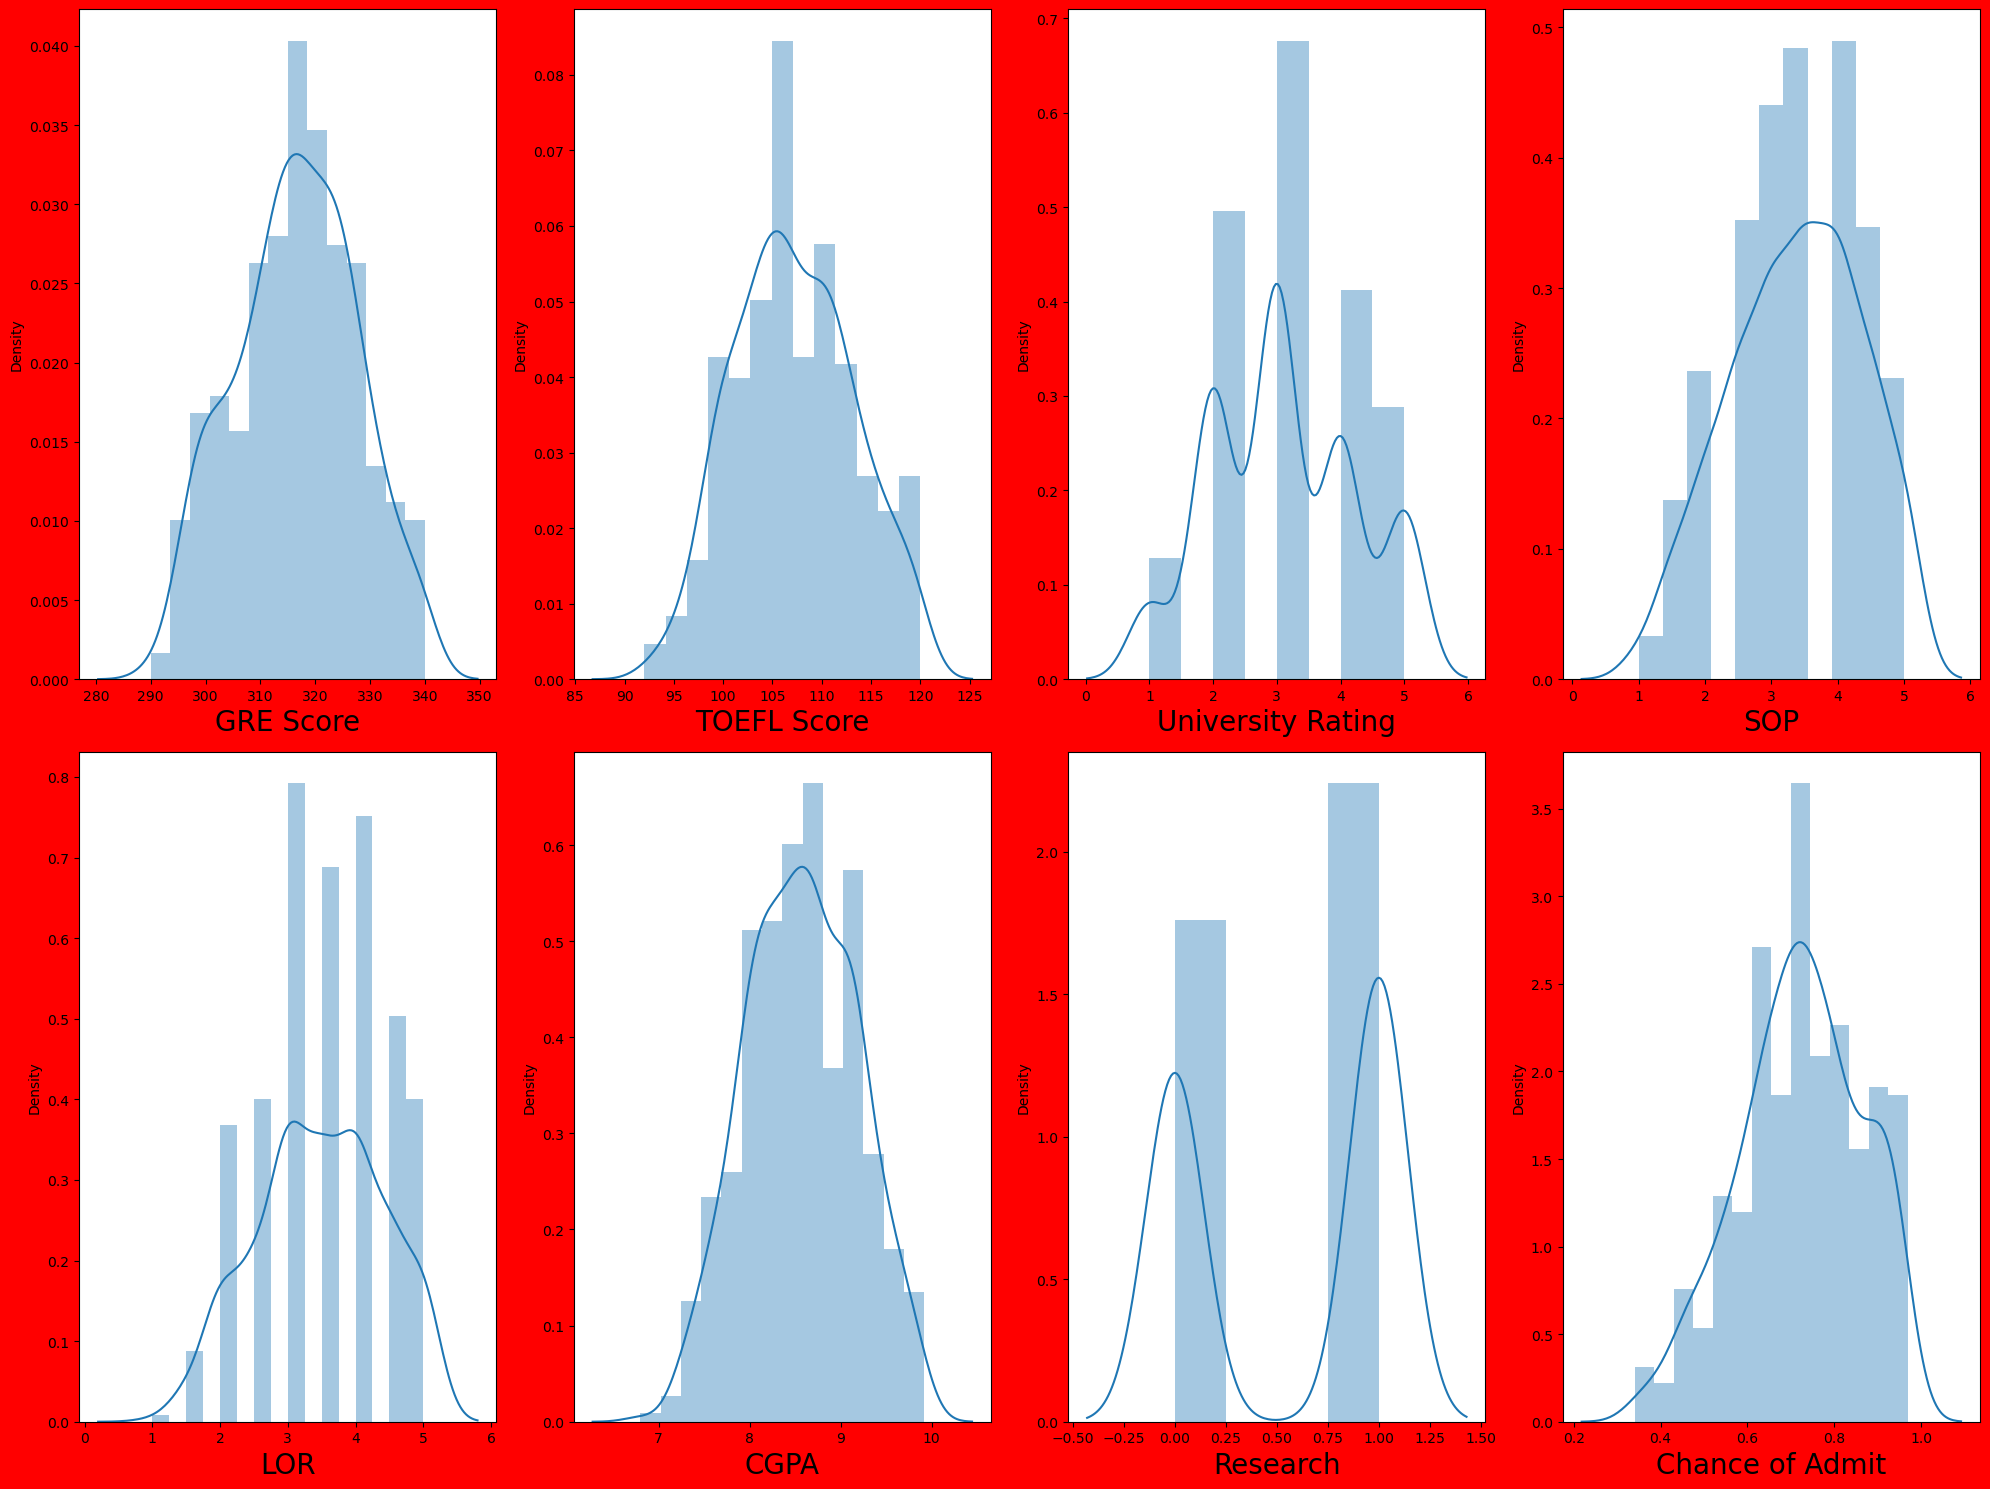

In [21]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    plt.tight_layout()

In [22]:
y=data['Chance of Admit']
x=data.drop(columns='Chance of Admit')
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [23]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


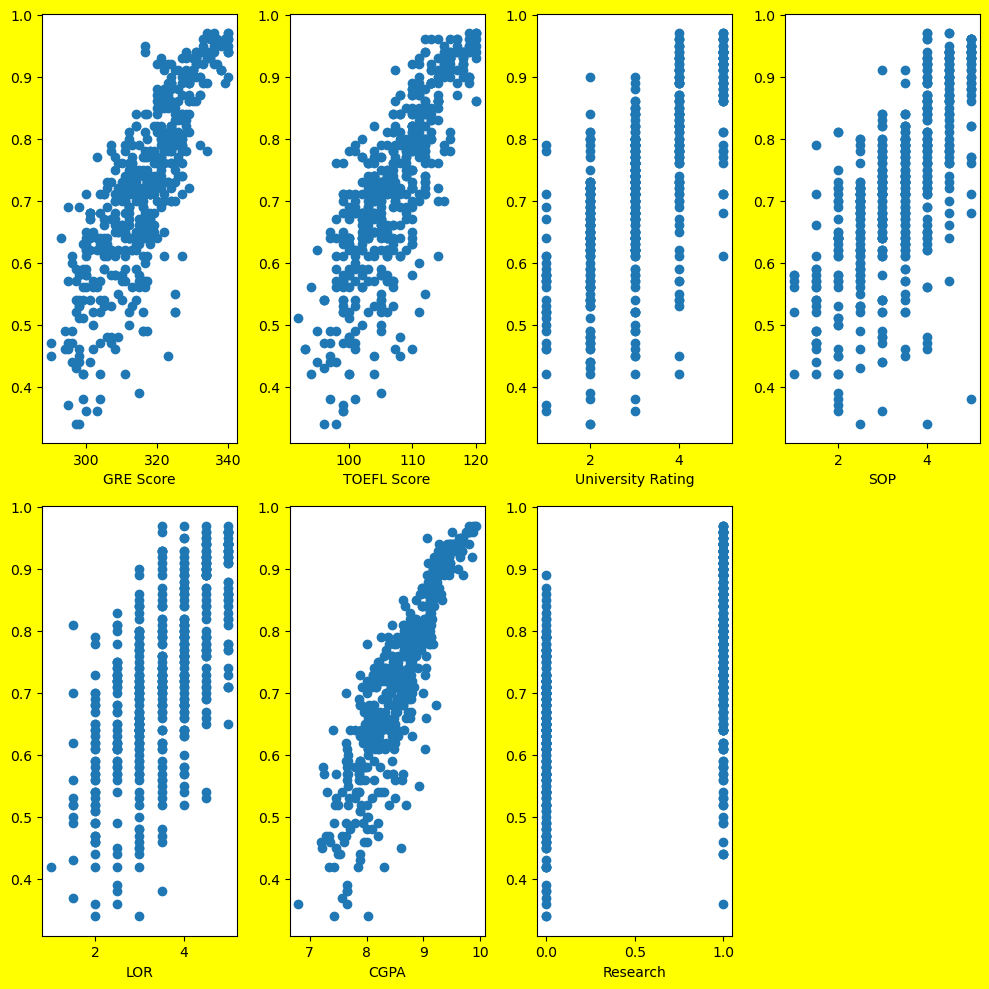

In [24]:
plt.figure(figsize=(10,10),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [30]:
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(x)
X_Scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,test_size=0.25,random_state=348)

In [32]:
y_train.head()

459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
Name: Chance of Admit, dtype: float64

In [33]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [34]:
data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [36]:
print('chance of Admission is:', regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

chance of Admission is: [0.82445851]


In [40]:
pickle.dump(regression,open('reg_model','wb'))

In [45]:
regression.score(x_train,y_train)

0.82855357382842

In [47]:
regression.score(x_test,y_test)

0.7928310580010802

In [48]:
x_test[1]

array([2.11318582, 0.79603295, 0.78200955, 1.64240413, 1.09894429,
       1.79335687, 0.88640526])

In [49]:
y_pred=regression.predict(x_test)

In [50]:
y_pred

array([0.8207641 , 0.94873455, 0.91113259, 0.61044355, 0.66137595,
       0.60352359, 0.83223756, 0.63090419, 0.78083483, 0.76003632,
       0.61343331, 0.5171975 , 0.84481161, 0.47026296, 0.9080331 ,
       0.62012908, 0.73074873, 0.63424789, 0.82329681, 0.57632803,
       0.80849253, 0.75415425, 0.65115419, 0.53199278, 0.55202691,
       0.49318412, 0.8954953 , 0.77677743, 0.72036651, 0.42326242,
       0.82315696, 0.79339286, 0.62530834, 0.67328918, 0.77417537,
       0.63745613, 0.80739236, 0.78788545, 0.58911428, 0.66156995,
       0.73593055, 0.59762008, 0.86327735, 0.94441147, 0.98184889,
       0.51308745, 0.77626965, 0.92424654, 0.63718128, 0.96940982,
       0.65572611, 0.63867889, 0.81411786, 0.73643354, 0.68692311,
       0.55261258, 0.43652872, 0.64497596, 0.68382796, 0.68701788,
       0.86409285, 0.67198884, 0.78792379, 0.65534022, 0.95792159,
       0.61596565, 0.72449619, 0.53769901, 0.59184804, 0.78917924,
       0.74441132, 0.6447335 , 0.99270469, 0.66219368, 0.65200

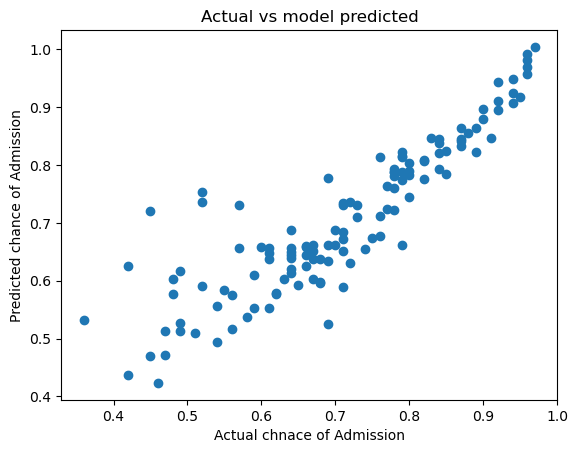

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chnace of Admission')
plt.ylabel('Predicted chance of Admission')
plt.title('Actual vs model predicted')
plt.show()